In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("FoodData.csv")
df.head()

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    184 non-null    object
 1   Type     184 non-null    object
 2   Group    184 non-null    object
 3   Food     184 non-null    object
 4   Allergy  162 non-null    object
dtypes: object(5)
memory usage: 7.3+ KB


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    162 non-null    object
 1   Type     162 non-null    object
 2   Group    162 non-null    object
 3   Food     162 non-null    object
 4   Allergy  162 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


In [6]:
df.drop(columns=['Class','Type','Group'], inplace=True)
df.head()

,Food,Allergy
0,Almond,Nut Allergy
1,Apple,Oral Allergy Syndrome
2,Apricot,Stone Fruit Allergy
3,Artichoke,Insulin Allergy
4,Asparagus,Allium Allergy


In [10]:
df['Allergy'].value_counts()

Allergy
Legume Allergy                        14
Oral Allergy Syndrome                 13
Fish Allergy                          12
Milk allergy / Lactose intolerance    11
Cruciferous Allergy                    9
Stone Fruit Allergy                    7
Allium Allergy                         7
Alpha-gal Syndrome                     6
Hypersensitivity                       6
Salicylate Allergy                     6
Sugar Allergy / Intolerance            5
Nut Allergy                            5
Seed Allergy                           5
Potato Allergy                         5
Histamine Allergy                      5
Insulin Allergy                        5
Citrus Allergy                         5
Gluten Allergy                         4
Poultry Allergy                        4
Nightshade Allergy                     3
Corn Allergy                           3
Mushroom Allergy                       2
LTP Allergy                            2
Honey Allergy                          2
Mint All

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30536\2952081420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Allergy', data=df, palette='Set1')


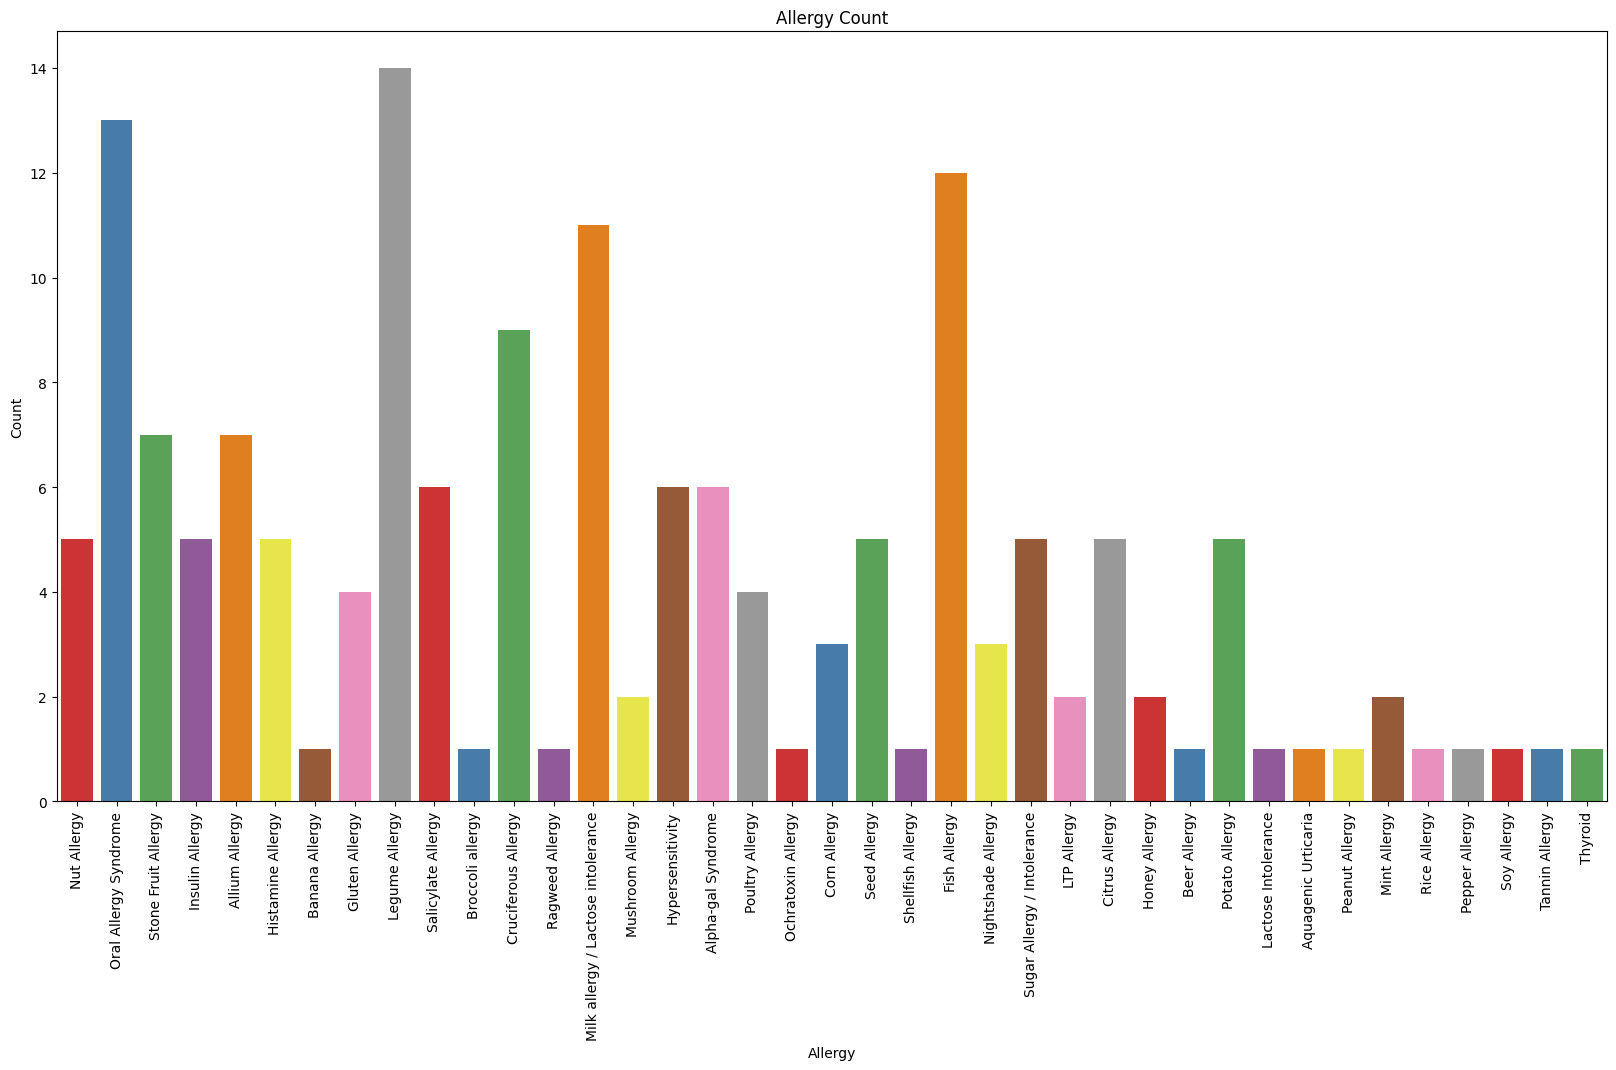

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Allergy', data=df, palette='Set1')
plt.title('Allergy Count')
plt.xlabel("Allergy")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [19]:
# Define substitutes for each food item (based on allergen-free alternatives)
substitutes = {
    "Almond": "Sunflower Seeds",
    "Apple": "Pear (cooked)",
    "Apricot": "Mango",
    "Artichoke": "Asparagus",
    "Asparagus": "Green Beans",
    "Avocado": "Zucchini",
    "Bamboo shoot": "Carrots",
    "Banana": "Mango",
    "Barley": "Rice Flour",
    "Bean": "Green Beans",
    "Blackberry": "Blueberries (if tolerated)",
    "Black-eyed bean": "Lentils",
    "Blueberry": "Raspberries (if tolerated)",
    "Bonito": "Tofu",
    "Broad bean": "Chickpeas (if tolerated)",
    "Broccoli": "Cauliflower",
    "Brussels sprouts": "Broccoli",
    "Buckwheat": "Quinoa",
    "Burdock": "Parsnips",
    "Butter": "Coconut Oil",
    "Butter bean": "Lentils",
    "Buttermilk": "Almond Milk",
    "Button mushroom": "Portobello Mushroom (if tolerated)",
    "Cabbage": "Spinach",
    "Casein": "Coconut Cream",
    "Cattle": "Tempeh",
    "Cauliflower": "Broccoli",
    "Celery": "Carrots",
    "Cheese": "Vegan Cheese",
    "Cherry": "Mango",
    "Chestnut": "Pumpkin Seeds",
    "Chicken": "Tofu",
    "Chicory": "Lettuce",
    "Chinese cabbage": "Spinach",
    "Coffee bean": "Chicory Root (decaf)",
    "Corn": "Quinoa",
    "Cotton seed": "Sunflower Seeds",
    "Cranberry": "Raspberries (if tolerated)",
    "Cream": "Coconut Cream",
    "Crustaceans": "Tofu",
    "Custard": "Coconut Custard",
    "Date": "Prunes",
    "Deer": "Tempeh",
    "Duck": "Tofu",
    "Eel": "Tofu",
    "Egg plant": "Zucchini",
    "Eggs": "Flaxseed Mix",
    "Endive": "Lettuce",
    "Fructose": "Stevia",
    "Garlic": "Chives",
    "Ginger": "Turmeric",
    "Ginkgo nut": "Pumpkin Seeds",
    "Globfish": "Tofu",
    "Glucose": "Honey (if tolerated)",
    "Goat": "Tempeh",
    "Grape": "Pear",
    "Grapefruit": "Orange (if tolerated)",
    "Green soybean": "Chickpeas",
    "Guava": "Mango",
    "Honey": "Maple Syrup",
    "Hop": "Chamomile",
    "Horse": "Tempeh",
    "Horse Mackerel": "Tofu",
    "Horseradish": "Wasabi (if tolerated)",
    "Huckleberry": "Blueberries (if tolerated)",
    "Ice cream": "Vegan Ice Cream",
    "Japanese pear": "Pear",
    "Japanese plum": "Mango",
    "Kale": "Spinach",
    "Kidney bean": "Lentils",
    "Kiwi": "Mango",
    "Konjac": "Sweet Potato",
    "Kyona": "Spinach",
    "Lactose": "Lactose-Free Milk",
    "Leek": "Scallions",
    "Lemon": "Lime (if tolerated)",
    "Lentil": "Chickpeas",
    "Lettuce": "Spinach",
    "Lima bean": "Green Beans",
    "Lime": "Lemon (if tolerated)",
    "Loquat": "Pear",
    "Mackerel": "Tofu",
    "Mango": "Papaya",
    "Milk": "Almond Milk",
    "Mineral water": "Filtered Water",
    "Mitsuba": "Parsley",
    "Mume plum": "Mango",
    "Mustard Spinach": "Spinach",
    "Nectarine": "Mango",
    "Nira": "Scallions",
    "Okra": "Zucchini",
    "Onion": "Chives",
    "Orange": "Grapefruit (if tolerated)",
    "Orange pulp": "Grapefruit (if tolerated)",
    "Papaya": "Mango",
    "Parsley": "Cilantro",
    "Parsnip": "Carrots",
    "Passion fruit": "Mango",
    "Peach": "Mango",
    "Peanut": "Sunflower Seeds",
    "Pear": "Apple (if tolerated)",
    "Peas": "Green Beans",
    "Pecan": "Pumpkin Seeds",
    "Pegia": "Lentils",
    "Peppermint": "Spearmint (if tolerated)",
    "Percifomes": "Tofu",
    "Pig": "Tempeh",
    "Pineapple": "Mango",
    "Popcorn": "Quinoa",
    "Potato": "Sweet Potato",
    "Prune": "Dates",
    "Qing-geng-cai": "Spinach",
    "Quince": "Pear",
    "Radish root": "Carrots",
    "Rapeseed": "Sunflower Seeds",
    "Raspberry": "Blueberries (if tolerated)",
    "Rice": "Quinoa",
    "Royal Jelly": "Maple Syrup",
    "Rye": "Rice Flour",
    "Safflower seed": "Sunflower Seeds",
    "Salmon": "Tofu",
    "Salsify": "Parsnips",
    "Sansho": "Black Pepper (if tolerated)",
    "Sea Bass": "Tofu",
    "Sea Bream": "Tofu",
    "Sesame seed": "Chia Seeds",
    "Shallot": "Scallions",
    "Sheep": "Tempeh",
    "Shelled mollusc": "Tofu",
    "Shiitake mushroom": "Portobello Mushroom (if tolerated)",
    "Shungiku": "Lettuce",
    "Sour cream": "Coconut Cream",
    "Soybean": "Chickpeas",
    "Spearmint": "Peppermint (if tolerated)",
    "Spinach": "Kale",
    "Strawberry": "Blueberries (if tolerated)",
    "Sugar": "Stevia",
    "Sugar beet": "Stevia",
    "Sugarcane": "Stevia",
    "Sultani": "Lentils",
    "Sultapya": "Lentils",
    "Sunflower seed": "Pumpkin Seeds",
    "Sweet corn": "Quinoa",
    "Sweet Pepper": "Zucchini",
    "Sweet potato": "Carrots",
    "Taro": "Sweet Potato",
    "Tea": "Herbal Tea",
    "Tetraodontiformes": "Tofu",
    "Tomato": "Zucchini",
    "Trout": "Tofu",
    "Tuna": "Tofu",
    "Turkey": "Tofu",
    "Turnip root": "Carrots",
    "Walnut": "Pumpkin Seeds",
    "Welsh": "Scallions",
    "Wheat": "Rice Flour",
    "Whey": "Coconut Cream",
    "White bean": "Lentils",
    "Yam": "Sweet Potato",
    "Yogurt": "Vegan Yogurt"
}

# Add substitutes to the DataFrame
df["Substitute"] = df["Food"].map(lambda x: substitutes.get(x, "No substitute available"))

In [20]:
df.head()

,Food,Allergy,Substitute
0,Almond,Nut Allergy,Sunflower Seeds
1,Apple,Oral Allergy Syndrome,Pear (cooked)
2,Apricot,Stone Fruit Allergy,Mango
3,Artichoke,Insulin Allergy,Asparagus
4,Asparagus,Allium Allergy,Green Beans


In [21]:
# Save to CSV
# csv_path = "/D:/Allergy_recipe_generator\\food_and_allergy.csv"
csv_path = "food_and_allergy.csv"
df.to_csv(csv_path, index=False)

print(f"CSV file created at: {csv_path}")

CSV file created at: food_and_allergy.csv
